In [85]:
using Graphs
using Random
using GenericTensorNetworks
using Optim
using PythonCall
plt = pyimport("matplotlib.pyplot");

In [86]:
using Bloqade

Now let us generate a nxn lattice with lattice constant a with some random defects.

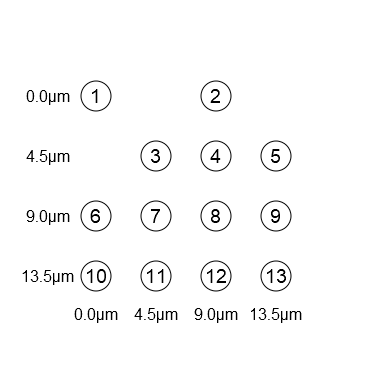

In [211]:
n = 4
a = 4.5

Random.seed!(2)
atoms = generate_sites(SquareLattice(), n, n; scale = a) |> random_dropout(0.2)

Now, let us look at the king's graph of this initial graph.

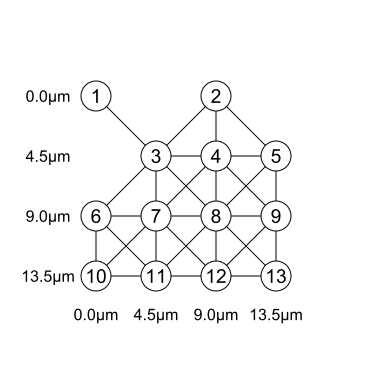

In [212]:
R_b = 7.5
Bloqade.plot(atoms, blockade_radius = R_b)

To compare our result to the classical simulation, we use the generic tensor network library to get the MIS size and degeneracy of our graph as a point of reference. 

In [213]:
graph = BloqadeMIS.unit_disk_graph(atoms, R_b)
mis_size_and_counting = GenericTensorNetworks.solve(IndependentSet(graph), CountingMax())[]

(4.0, 26.0)ₜ

Next, we calculate the blockage radius that we want, depending on what graph we want to solve and then determine the corresponding $\Delta$ and $\Omega$

In [215]:
C6 = 2*pi*862690
a = 4.5
R_b = sqrt(2*sqrt(2))*a
#R_b = 2*a

7.568067737283432

In [216]:
T_max = 4
Ω_max = 2π * 2
Ω = piecewise_linear(clocks = [0.0, 0.6, 3.4, T_max], values = [0.0, Ω_max, Ω_max, 0])
#Δ_start = -2π * 13
#Δ_end = 2π * 11
Δ_end = ((C6/(R_b)^6))
Δ_start = -Δ_end
Δ = piecewise_linear(clocks = [0.0, 0.6, 3.4, T_max], values = [Δ_start, Δ_start, Δ_end, Δ_end])

                    ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀Waveform{_, Float64}⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ 
                    ┌────────────────────────────────────────┐ 
                  5 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠤⠤⠤⠤⠤⠤│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
   value / 2π (MHz) │⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⢤⡤⠾⠥⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤⠤│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
                    │⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

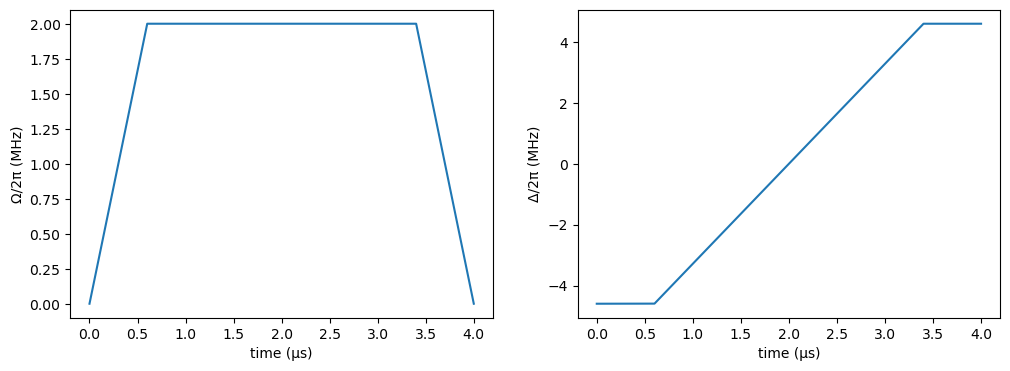

In [217]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig
#plt.savefig(fig,"figure")


Now, we want to simulate the time evolution of this to solve the MIS problem of this graph.

In [218]:
hamiltonian = rydberg_h(atoms; Ω = Ω, Δ = Δ)
prob = SchrodingerProblem(zero_state(nqubits(hamiltonian)), T_max, hamiltonian)
emulate!(prob)

SchrodingerProblem:
  register info:
    type: ArrayReg{2, ComplexF64, Matrix{ComplexF64}}
    storage size: 8 bytes

  time span (μs): (0.0, 4.0)

  equation: 
    storage size: 1.688 MiB
    expression:
nqubits: 13
+
├─ [+] ∑ 2π ⋅ 8.627e5.0/|x_i-x_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


    algorithm: DP8(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false),)
  options:
    save_everystep: false
    save_start: false
    save_on: false
    dense: false
    reltol: 1.0e-10
    abstol: 1.0e-10
    alias_u0: true


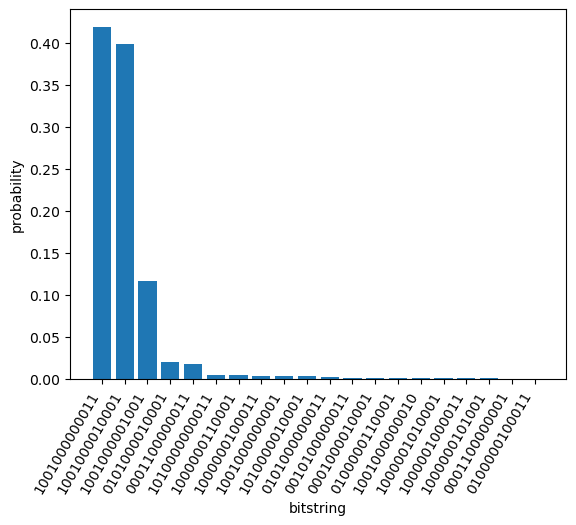

In [219]:
bitstring_hist(prob.reg; nlargest = 20)

In [220]:
best_bit_strings = most_probable(prob.reg, 2)
all_optimal_configs = GenericTensorNetworks.solve(IndependentSet(graph), ConfigsMax())[]
@assert all(bs -> GenericTensorNetworks.StaticBitVector([bs...]) ∈ all_optimal_configs.c, best_bit_strings)

We can look at how these solutions look like to visually check if they are correct

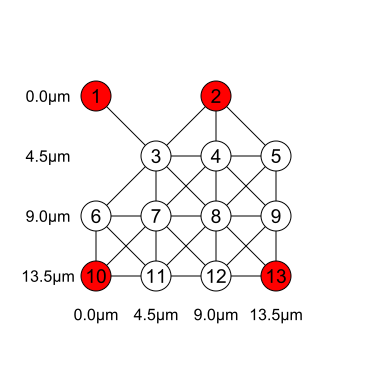

In [222]:
Bloqade.plot(atoms, blockade_radius = R_b; colors = [iszero(b) ? "white" : "red" for b ∈ best_bit_strings[1]])

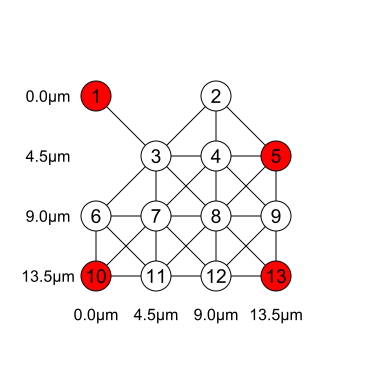

In [223]:
Bloqade.plot(atoms, blockade_radius = R_b; colors = [iszero(b) ? "white" : "red" for b ∈ best_bit_strings[2]])

In [224]:
best5_bit_strings = most_probable(prob.reg, 3)
BloqadeMIS.is_independent_set.(best5_bit_strings, Ref(graph))

3-element BitVector:
 1
 1
 1

In [225]:
fixed = mis_postprocessing(best5_bit_strings[3], graph)
print(fixed)
BloqadeMIS.is_independent_set(fixed, graph)

Bool[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]

true

As a next step, we want to optimize the pulse shapes of our laser. To do so, we have to make them smooth in order to optimize over them. 

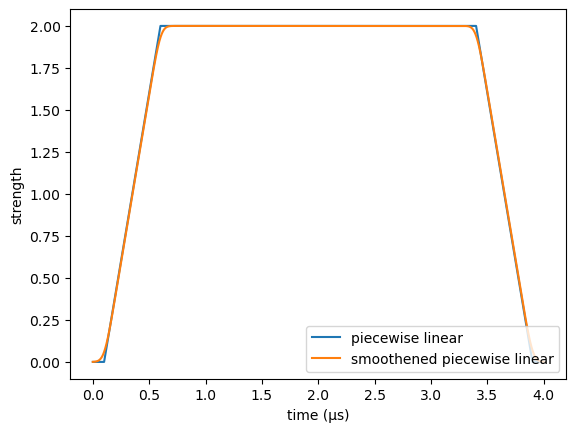

In [100]:
pulse_piecewise_linear = piecewise_linear(clocks = [0.0, 0.1, 0.6, 3.4, 3.9, T_max], values = [0.0,0.0, Ω_max, Ω_max, 0.0, 0]);
pulse_smooth = smooth(pulse_piecewise_linear; kernel_radius = 0.04);

fig, ax = plt.subplots()
Bloqade.plot!(ax, pulse_piecewise_linear)
Bloqade.plot!(ax, pulse_smooth)
ax.set_ylabel("strength")
ax.legend(["piecewise linear", "smoothened piecewise linear"], loc = "lower right")
fig

In [175]:
function loss_piecewise_linear(atoms::AtomList, x::AbstractVector{T}) where {T}
    @assert length(x) == 3
    Ω_max = 2π * 2.5
    Δ_end = ((C6/(R_b)^6))
    Δ_start = -Δ_end
    Δ0 = Δ_end
    T_max = 4

    # the strength of the detunings at each step takes the optimizing x as their input
    Δs = smooth(
        piecewise_linear(
            clocks = T[0.0, 0.6,
                1.4, 2.2, 3.0, 3.4, T_max],
            values = T[Δ_start, Δ_start, Δ0*x[1], Δ0*x[2], Δ0*x[3], Δ_end, Δ_end],
        );
        kernel_radius = 0.1,
    )
    Ωs = smooth(
        piecewise_linear(clocks = T[0.0, 0.1, 0.6, 3.4, 3.9, T_max], values = T[0.0,0.0, Ω_max, Ω_max, 0.0, 0]);
        kernel_radius = 0.1,
    )

    hamiltonian = rydberg_h(atoms; Ω = Ωs, Δ = Δs)
    subspace = blockade_subspace(atoms, 7.5)
    prob = SchrodingerProblem(zero_state(Complex{T}, subspace), T_max, hamiltonian)
    emulate!(prob)
    return -rydberg_density_sum(prob.reg), prob.reg, Δs
end

x0 = [-0.4, 0.15, 0.7]; # initial point for the optimization

In [176]:
#Δ_start = -13 * 2π
#Δ_end = 11 * 2π
Δ_end = ((C6/(R_b)^6))
Δ_start = -Δ_end
Δ0 = Δ_end
T_max = 4
Δ_initial = piecewise_linear(
    clocks = [0.0, 0.6, 1.4, 2.2, 3.0,3.4, T_max],
    values = [Δ_start,Δ_start, Δ0 * x0[1], Δ0 * x0[2], Δ0 * x0[3], Δ_end, Δ_end],
)

rydberg_density, reg2, Δ_initial_smooth = loss_piecewise_linear(atoms, x0)
rydberg_density

-1.4055292233645282

-3.998767705156708

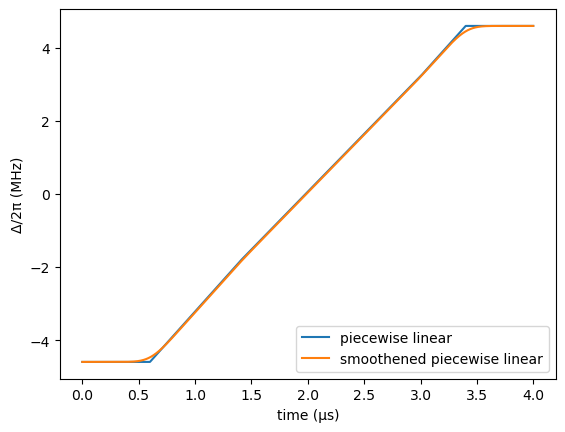

In [177]:
fig, ax = plt.subplots()
Bloqade.plot!(ax, Δ_initial)
Bloqade.plot!(ax, Δ_initial_smooth)
ax.set_ylabel("Δ/2π (MHz)")
ax.legend(["piecewise linear", "smoothened piecewise linear"], loc = "lower right")
fig

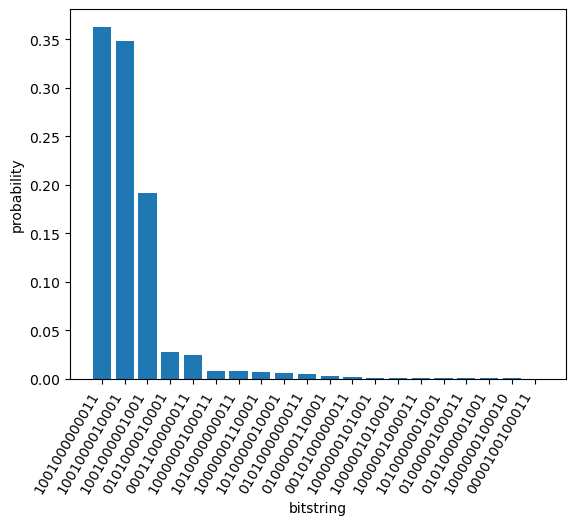

In [178]:
bitstring_hist(reg2; nlargest = 20)

We use the Nelder Mead method to optimize the $\Delta$ pulse by adding a few extra points and choosing a starting point $x_0$ for the optimization. 

In [160]:
optresult = Optim.optimize(x -> loss_piecewise_linear(atoms, x)[1], x0)

rydberg_density_final, reg_final, Δ_final = loss_piecewise_linear(atoms, optresult.minimizer)
rydberg_density_final

-3.9953557427532345

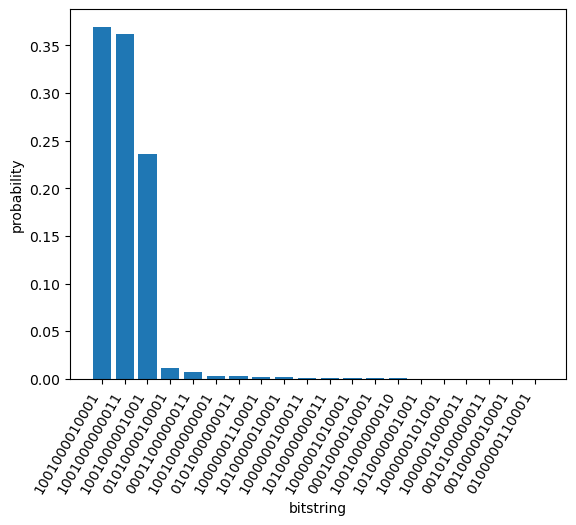

In [161]:
bitstring_hist(reg_final; nlargest = 20)

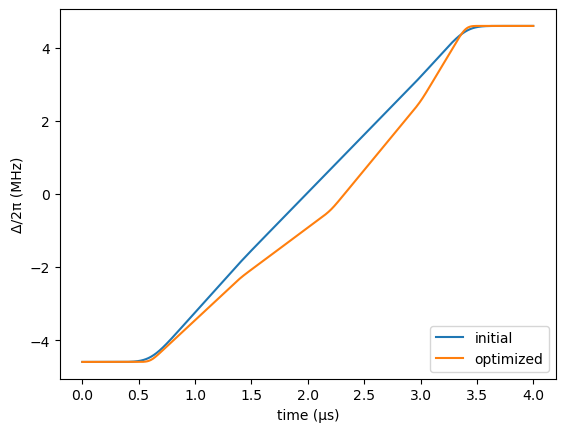

In [183]:
fig, ax = plt.subplots()
Bloqade.plot!(ax, Δ_initial_smooth)
Bloqade.plot!(ax, Δ_final)
ax.set_ylabel("Δ/2π (MHz)")
ax.legend(["initial", "optimized"], loc = "lower right")
fig